# Pekan 3 DS05 Hepatitis C

### Table of Contents
* [1. Pengumpulan Data](#h1)
* [2. Menelaah Data](#h2)
* [3. Validasi Data](#h3)
* [4. Menentukan Object Data](#h4)
* [5. Membersihkan Data](#h5)
* [6. Konstruksi Data](#h6)
* [7. Menentukan Label Data](#h7)
* [8. Membangun dan Mengevaluasi Model](#h8)
* [9. Komparasi Model](#h9)
* [10. Optimisasi Model](#h10)
* [11. Kesimpulan](#h11)
* [12. Streamlit](#h12)

Dataset yang digunakan diambil dari sumber berikut: https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset. File yang dipakai adalah "HepatitisCdata.csv".

Untuk memahami struktur dan tujuan dataset agar dapat digunakan secara optimal, pastikan Anda membaca deskripsi lengkapnya pada link tersebut.

Dataset ini mencakup data tabular dengan 14 kolom yang terdiri dari data demografi dan hasil laboratorium.

Fitur-fitur dalam dataset meliputi:
1. X: ID atau nomor pasien.
2. Category: Diagnosis pasien (0=Blood Donor, 0s=Suspect Blood Donor, 1=Hepatitis, 2=Fibrosis, 3=Cirrhosis).
3. Age: Usia pasien dalam tahun.
4. Sex: Jenis kelamin pasien (f/m).
5. ALB: Albumin.
6. ALP: Alkaline Phosphatase.
7. ALT: Alanine Aminotransferase.
8. AST: Aspartate Aminotransferase.
9. BIL: Bilirubin.
10. CHE: Cholinesterase.
11. CHOL: Kolesterol.
12. CREA: Creatinine.
13. GGT: Gamma-Glutamyl Transferase.
14. PROT: Protein.

Target dalam klasifikasi ini adalah atribut Category, yang digunakan untuk membedakan antara pendonor darah dan pasien Hepatitis C (termasuk perkembangannya seperti Fibrosis dan Cirrhosis).

# 1.) Pengumpulan Data
- Struktur Data:

  Dataset terdiri dari 13 kolom fitur, dengan 1 kolom target bernama Category.

- Target
(Kolom Category):
  - 0 = Blood Donor.
  - 0s = Suspect Blood Donor.
  - 1 = Hepatitis.
  - 2 = Fibrosis.
  - 3 = Cirrhosis

## Import Library

In [ ]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load Dataset
Metode:
1. Load langsung di workspace Google Colab
2. Load dari Google Drive

Pada notebook ini kita menggunakan metode load data dari Google Drive

In [ ]:
# Buat akses dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Baca dataset menggunakan library pandas dan masukkan ke sebuah variabel (misalnya df)
df = pd.read_csv('/content/drive/MyDrive/BK_DataScience_2024/Dataset/HepatitisCdata.csv')

# Tampilkan 5 data teratas dari dataset
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# 2.) Menelaah Data

## Melihat Dimensi Dataset
Gunakan `.shape` untuk memahami jumlah baris dan kolom

In [ ]:
# Tampilkan dimensi
df.shape

(615, 14)

## Melihat Informasi Dataset
Gunakan `.info()` untuk memahami tipe data setiap kolom

In [ ]:
# Tampilkan informasi kolom dan memori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


Setelah melihat informasi dari dataset tersebut, bisa dilihat bahwa masih terdapat beberapa kolom bertipe object dan terdapat beberapa missing value.

Oleh karena itu, harus dilakukan konversi tipe data dan missing value handling agar data bisa diolah dengan baik.

## Memeriksa Deskripsi Statistik
Gunakan `.describe()` untuk melihat ringkasan statistik seperti rata-rata, median, dll

In [ ]:
# Tampilkan deskripsi statistik dari masing-masing feature bertipe numerik
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


## Memeriksa Nilai Unik

### Nilai Unik pada Kolom Tertentu

In [ ]:
# Tampilkan nilai-nilai unik dalam kolom-kolom tertentu yang telah ditentukan dalam daftar cols
cols = ['Age']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

Age has [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 76 77 74 19 23 25 27 29 30
 75] values



### Nilai Unik pada Kolom Kategori

In [ ]:
# Kelolompokkan kolom yang bertipe data kategorikal
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
# Tampilkan nilai-nilai unik yang ada pada setiap kolom kategori dalam dataset
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Category has ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis'] values

Sex has ['m' 'f'] values



# 3.) Validasi Data
Memeriksa apakah data valid dan sesuai untuk digunakan dalam analisis.

*   Pastikan tidak ada variabel yang nilainya kosong
*   Pastikan tidak ada outlier yang ekstrem.

## Memeriksa nilai kosong (Missing Value)
Gunakan `.isnull()` untuk melihat data yang kosong dan `.isnull().sum()` untuk mengetahui berapa jumlah data yang kosong.

In [ ]:
# Tampilkan kosong/tidaknya data

# False = data terisi
# True = data kosong
df.isnull()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


In [ ]:
# Tampilkan kolom yang memiliki missing value
df.loc[:, df.isnull().any()].columns

Index(['ALB', 'ALP', 'ALT', 'CHOL', 'PROT'], dtype='object')

## Melihat Distribusi Kelas Target
Memastikan distribusi kelas target merata/seimbang

<ipython-input-1779-3ea675132787>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, hue=None, x="Category", palette=colours, legend=False)
<ipython-input-1779-3ea675132787>:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, hue=None, x="Category", palette=colours, legend=False)


<Axes: xlabel='Category', ylabel='count'>

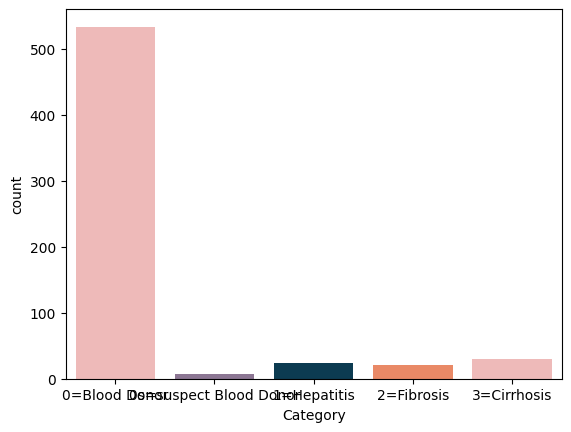

In [ ]:
# Buat bar chart untuk visualisasi jumlah masing-masing kelas target
colours = ["#f7b2b0", "#8f7198", "#003f5c", "#ff7f50"]
sns.countplot(data=df, hue=None, x="Category", palette=colours, legend=False)

Count Plot menunjukkan ketidakseimbangan target(kelas) dalam data.

Diagram tersebut menunjukkan dataset akan cenderung memberikan akurasi klasifikasi yang buruk karena bisa saja akurasi trainingnya tinggi, namun akurasi testingnya rendah.
Parameter yang akan memberikan knowladge yang lebih baik:
1. Confussion Matrix
2. Precission
3. Recall
4. F1 Score

# 4.) Menentukan Object Data
Menentukan feature: Kolom mana saja yang akan digunakan untuk pemodelan.

Gunakan `.drop` untuk menghapus.

Kolom pertama merupakan kolom ID pasien yang tidak diperlukan untuk melatih model.

- Identifikasi Kolom 'Unnamed' (opsional) `print(df.columns)`


Metode:
- Menghapus Kolom Berdasarkan Nama `df.drop(columns=['Unnamed: 0'])`
- Menghapus Kolom Berdasarkan Indeks `df.drop(df.columns[0], axis=1, inplace=True)` atau `df = df.drop(df.columns[0], axis=1)`
- Menghapus Semua Kolom 'Unnamed' Secara Otomatis `df = df.loc[:, ~df.columns.str.contains('^Unnamed')]`
- Mengabaikan Kolom 'Unnamed' Saat Membaca File `df = pd.read_csv('file.csv', index_col=0)`

In [ ]:
# Hapus berdasarkan Index
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
# Pastikan hasil penghapusan kolom
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Membagi dataset berdasarkan tipe data

In [ ]:
# Membagi kolom bertipe kategorikal dan numerik
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
# Pastikan dimensi setelah penghapusan feature
df.shape

(615, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


# 5.) Membersihkan Data

Karena ditemukan missing value pada dataset, perlu dilakukan handling missing value agar data bisa diolah dengan baik.

Cara:
- Menghapus missing value
- Mengisi missing value dengan nilai tertentu

## Jumlah Missing Value

In [ ]:
# Tampilkan jumlah missing value di setiap kolom.
df.isna().sum().sort_values(ascending = False)

,0
ALP,18
CHOL,10
ALB,1
ALT,1
PROT,1
Category,0
Age,0
Sex,0
AST,0
BIL,0


### Kolom Numerik

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
# Periksa missing value pada kolom numerik yang tercantum dalam num_cols
df[num_cols].isnull().sum()

,0
Age,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0
CHOL,10
CREA,0
GGT,0


Terdapat 5 missing value pada kolom bertipe numerik

### Kolom Kategorikal

In [ ]:
# Periksa missing value pada kolom kategori yang tercantum dalam cat_cols
df[cat_cols].isnull().sum()

,0
Category,0
Sex,0


Tidak terdapat 5 missing value pada kolom bertipe kategorikal

## Handling Missing Value

Metode:

*   Random Value Imputation: Mengisi missing value dengan sampel acak dari nilai non-null di kolom yang sama. Digunakan untuk kolom dengan banyak nilai hilang. Random Value Imputation bertujuan untuk mempertahankan variasi dalam data.
*   Mean/Mode Imputation: Mengisi missing value dengan rata-rata (mean) untuk data numerik atau modus (mode) untuk data kategorikal. Digunakan untuk kolom dengan sedikit nilai hilang.

Karena kolom yang memiliki missing value bertipe numerik, maka lakukan imputasi dengan mean.

### Imputasi Numerik

In [ ]:
# Daftar kolom yang memiliki missing value
columns_with_missing = ['ALP', 'CHOL', 'ALB', 'ALT', 'PROT']

# Imputasi missing value menggunakan mean
for col in columns_with_missing:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-1789-6322feae8414>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


### Verifikasi Imputasi

In [ ]:
# Verifikasi apakah missing value sudah terisi
print(df[columns_with_missing].isnull().sum())

ALP     0
CHOL    0
ALB     0
ALT     0
PROT    0
dtype: int64


Semua kalom yang sebelumnya memiliki missing value sudah tidak memiliki missing value lagi

### Imputasi Kategorikal

In [ ]:
# # Imputasi missing value pada kolom 'Sex' (kategorikal) menggunakan modus
# df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)

### Verifikasi Imputasi

In [ ]:
# # Verifikasi apakah missing value sudah terisi
# print(df['Sex'].isnull().sum())

### Periksa Hasil Imputasi

In [ ]:
# Periksa informasi jumlah Non-Null apakah sudah sama
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


## Handling Duplikat Data

Metode:

* Menampilkan 1 data dari masing-masing data duplikat `duplicates = df[df.duplicated()]`
* Menimpilkan semua data duplikat `all_duplicates = df[df.duplicated(keep=False)]`

In [ ]:
# Perika jumlah baris duplikat
df.duplicated().sum()

0

In [ ]:
# Tampilkan data duplikat
duplicates = df[df.duplicated(keep=False)]
duplicates

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT


Tidak ada data duplikat pada dataset

## Mengonversi Tipe Data (Label Encoding)
Label Encoding adalah proses mengubah data kategorikal (berupa teks atau string) menjadi nilai numerik yang unik untuk setiap kategori. Metode ini sering digunakan sebagai langkah preprocessing untuk data kategorikal agar dapat digunakan oleh algoritma pembelajaran mesin.

In [ ]:
# Tampilkan jumlah kategori unik pada setiap kolom kategori
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

Category has 5 categories

Sex has 2 categories



In [ ]:
# Periksa kembali dataset
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### Import Library

In [ ]:
# Import LabelEncoder
# LabelEncoder: Salah satu metode dari sklearn untuk mengubah data kategori menjadi angka seperti 0, 1, 2 dst
from sklearn.preprocessing import LabelEncoder

### Proses Encoding

In [ ]:
# Inisialisasi Label Encoder
le = LabelEncoder()

# Lakukan Encoding pada kolom Kategori (mengubah kategori menjadi angka unik)
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

### Periksa Hasil Encoding

In [ ]:
# Tampilkan informasi kolom dan memori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


In [ ]:
# Tampilkan bentuk dataset setelah label encoding
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Deteksi Outliers

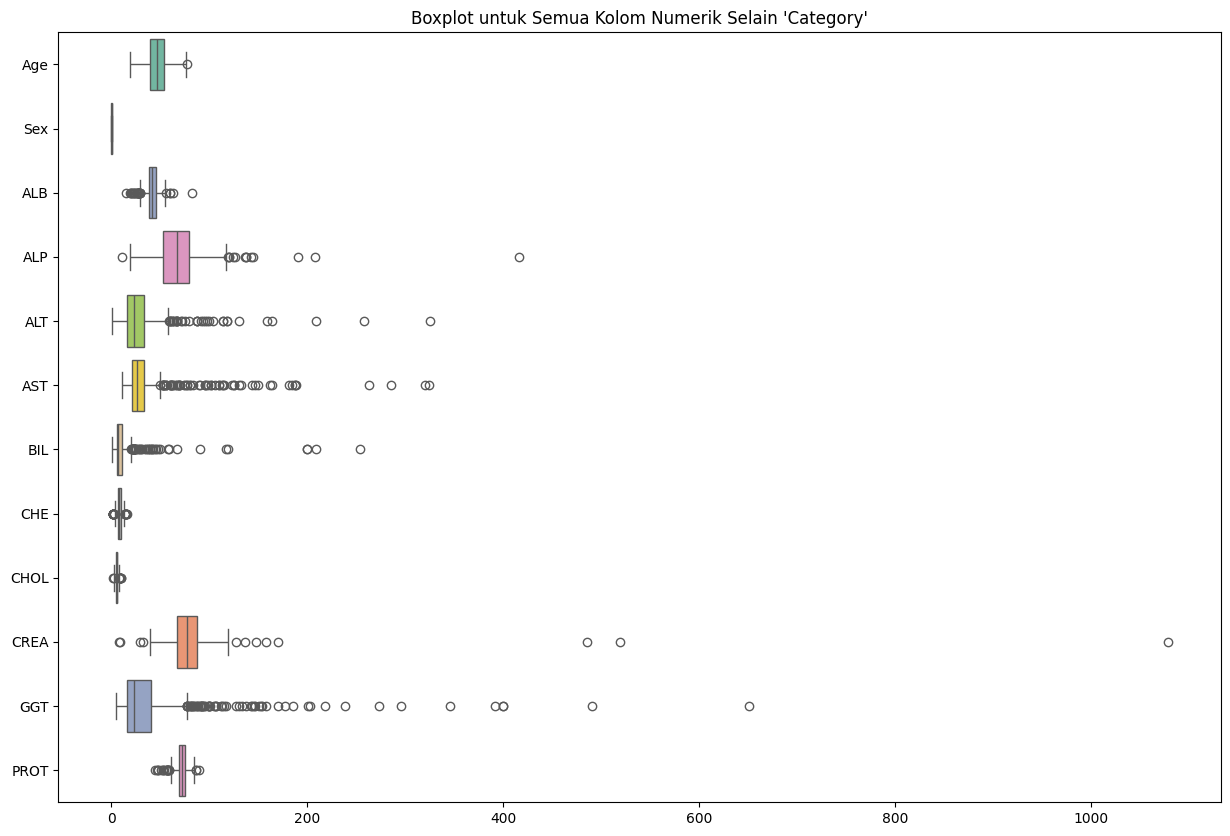

In [ ]:
# Pilih hanya kolom numerik selain kolom Target
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols[numerical_cols != 'Category']  # Menghapus kolom 'Category'

# Buat boxplot untuk setiap kolom numerik selain 'Category'
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols], orient='h', palette="Set2")
plt.title("Boxplot untuk Semua Kolom Numerik Selain 'Category'")
plt.show()

Menghapus outlier bukanlah keputusan yang mudah karena bisa jadi memberi pengaruh buruk pada analisis atau model. Meskipun terkadang menghapus outlier dapat menghasilkan statistik atau model yang lebih baik, tetap saja ada risiko overfitting, yaitu model terlalu terfokus pada data yang tersisa dan tidak dapat bekerja baik pada data baru.

### Handling Outliers

In [ ]:
data_iqr = df.copy() # Buat copy dataset asli
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if col not in ['Age', 'Category', 'Sex']:  # Kecualikan kolom 'Age', 'Category', dan 'Sex' (karena bertipe kategorikal)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Ganti outliers dengan batas bawah/atas
        data_iqr[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        print(f"Outliers pada kolom '{col}' telah ditangani menggunakan metode IQR.")

Outliers pada kolom 'ALB' telah ditangani menggunakan metode IQR.
Outliers pada kolom 'ALP' telah ditangani menggunakan metode IQR.
Outliers pada kolom 'ALT' telah ditangani menggunakan metode IQR.
Outliers pada kolom 'AST' telah ditangani menggunakan metode IQR.
Outliers pada kolom 'BIL' telah ditangani menggunakan metode IQR.
Outliers pada kolom 'CHE' telah ditangani menggunakan metode IQR.
Outliers pada kolom 'CHOL' telah ditangani menggunakan metode IQR.
Outliers pada kolom 'CREA' telah ditangani menggunakan metode IQR.
Outliers pada kolom 'GGT' telah ditangani menggunakan metode IQR.
Outliers pada kolom 'PROT' telah ditangani menggunakan metode IQR.


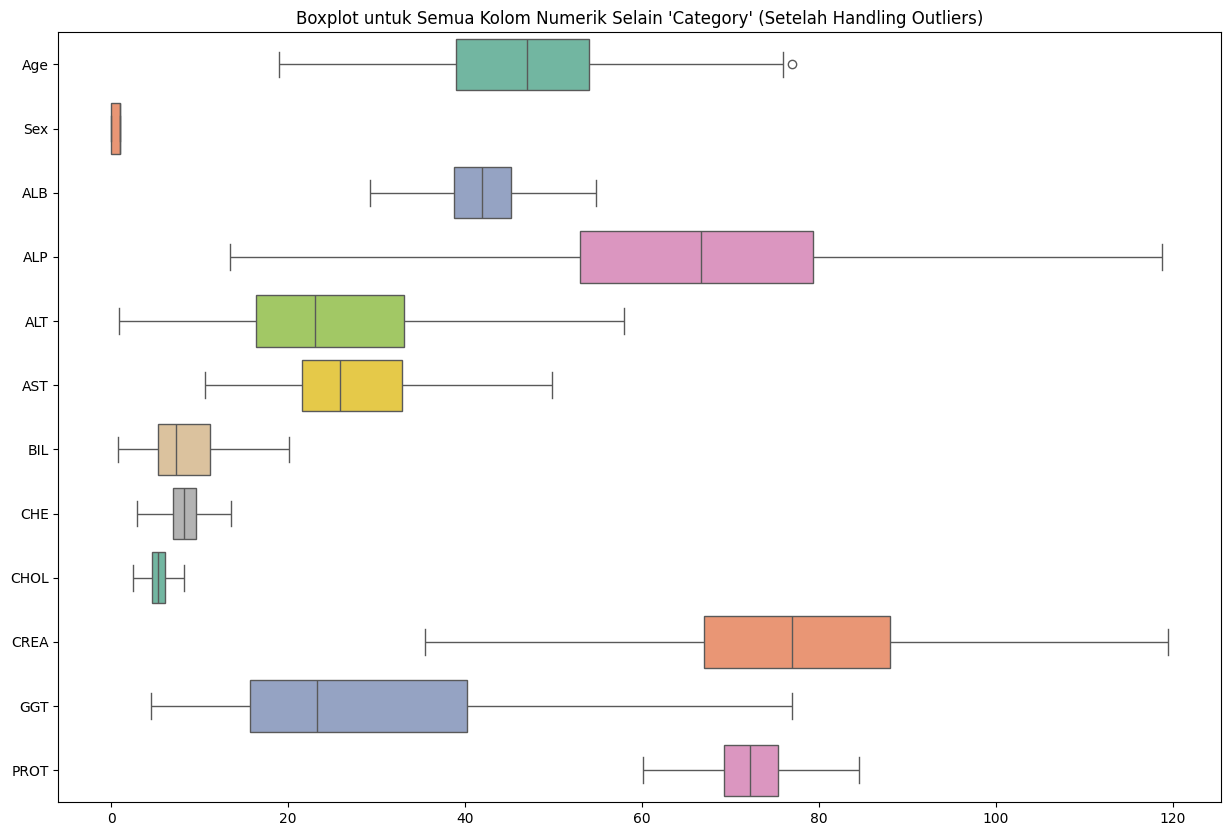

In [ ]:
# Pilih hanya kolom numerik selain kolom target
numerical_cols = data_iqr.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols[numerical_cols != 'Category']  # Menghapus kolom 'Category'

# Buat boxplot untuk setiap kolom numerik selain 'Category'
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_iqr[numerical_cols], orient='h', palette="Set2")
plt.title("Boxplot untuk Semua Kolom Numerik Selain 'Category' (Setelah Handling Outliers)")
plt.show()

# 6.) Konstruksi Data

## Handling Imbalance Data

### Import Library

In [ ]:
# Import Library yang dibutuhkan untuk handling imbalance
# Menggunakan metode oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split

In [ ]:
# Memisahkan kolom feature dan kolom target
X = data_iqr.drop("Category",axis=1).values
y = data_iqr['Category']

In [ ]:
# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Oversampling menggunakan RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
# Tampilkan distribusi kelas
"Distribusi kelas setelah oversampling:", Counter(y_over)

('Distribusi kelas setelah oversampling:',
 Counter({0: 372, 4: 372, 1: 372, 2: 372, 3: 372}))

### Visualisasi Sebelum Handling

<ipython-input-1810-f91941c3a5c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")


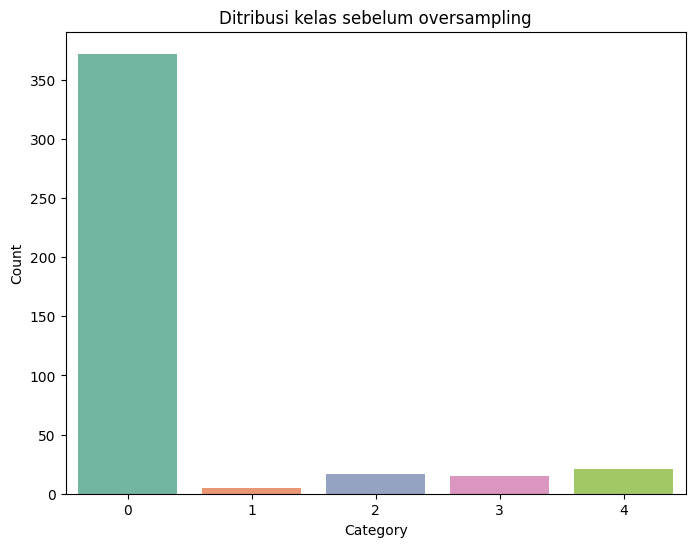

<ipython-input-1810-f91941c3a5c6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_over, palette="Set2")


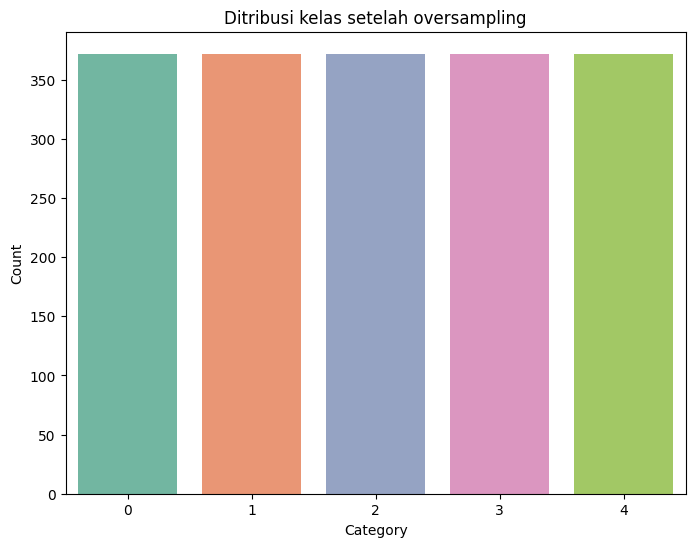

In [ ]:
# Visualisasi distribusi kelas sebelum handling imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette="Set2")
plt.title("Ditribusi kelas sebelum oversampling")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Oversampling menggunakan RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Visualisasi distribusi kelas setelah oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_over, palette="Set2")
plt.title("Ditribusi kelas setelah oversampling")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Melihat Hasil Handling Imbalance

In [ ]:
oversampled_df = pd.DataFrame(X_over, columns=data_iqr.drop("Category", axis=1).columns)
oversampled_df['Category'] = y_over

# Tampilkan dataset setelah oversampling
oversampled_df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,35.0,1.0,48.7,72.70000,24.100,31.00,20.05,9.40,3.80,90.0,20.00,75.8,0
1,37.0,1.0,41.5,64.60000,23.700,29.90,9.30,5.49,3.97,100.0,10.40,69.3,0
2,46.0,1.0,35.0,109.60000,2.300,19.20,11.00,7.10,4.10,119.5,76.95,69.1,4
3,50.0,1.0,40.0,87.80000,58.025,49.85,4.80,8.70,6.46,76.0,76.95,71.0,0
4,44.0,1.0,38.4,110.80000,17.200,30.70,4.60,9.51,5.12,74.0,25.20,73.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,61.0,1.0,39.0,102.90000,27.300,49.85,15.00,5.38,4.88,72.3,76.95,73.4,4
1856,42.0,1.0,36.0,69.60000,14.900,49.85,20.05,3.61,3.93,49.6,61.00,68.6,4
1857,58.0,0.0,34.0,46.40000,15.000,49.85,8.00,6.26,3.98,56.0,49.70,80.6,4
1858,59.0,0.0,36.0,68.28392,58.025,49.85,12.00,9.07,5.30,67.0,34.00,68.0,4


## Korelasi

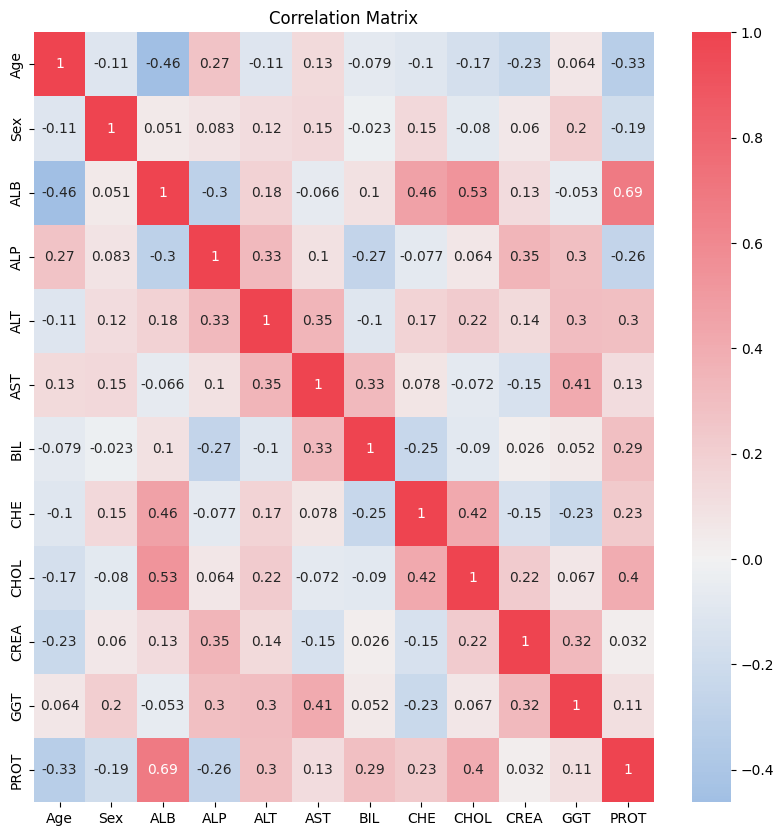

In [ ]:
# Tampilkan matrix korelasi tanpa kolom "Category"
corrmat = oversampled_df.drop(columns=["Category"]).corr()
plt.figure(figsize=(10, 10))

# Beri warna
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

# Plot
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
plt.title("Correlation Matrix")
plt.show()

Paling berkorelasi positif: ALB dengan PROT (0.69)

Paling berkorelasi negatif: ALB dengan AGE (-0.33)

## Hasil Akhir Pembersihan Data

### Visualisasi

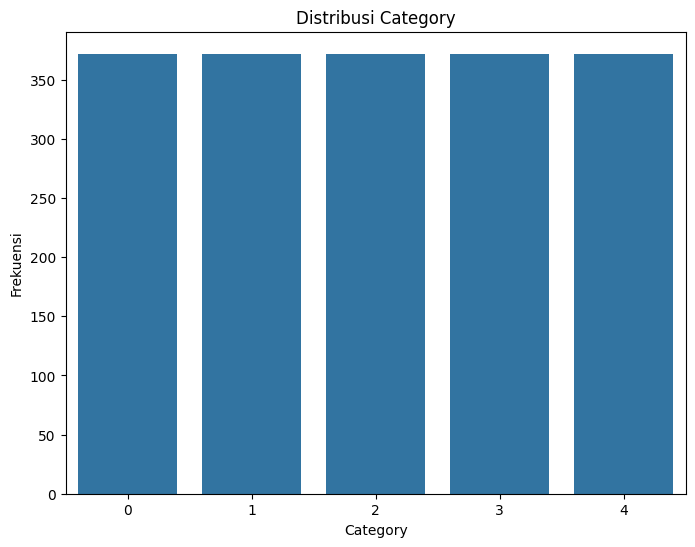

In [ ]:
# Buat bar chart untuk kolom 'Category'
plt.figure(figsize=(8, 6))
sns.countplot(data=oversampled_df, x='Category')
plt.title('Distribusi Category')
plt.xlabel('Category')
plt.ylabel('Frekuensi')
plt.show()

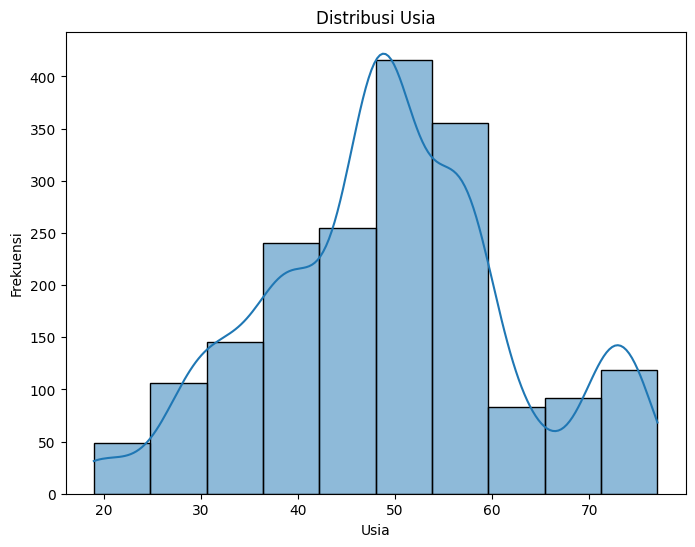

In [ ]:
# Buat histogram untuk kolom 'Age'
plt.figure(figsize=(8, 6))  # Atur ukuran gambar
sns.histplot(data=oversampled_df, x='Age', bins=10, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

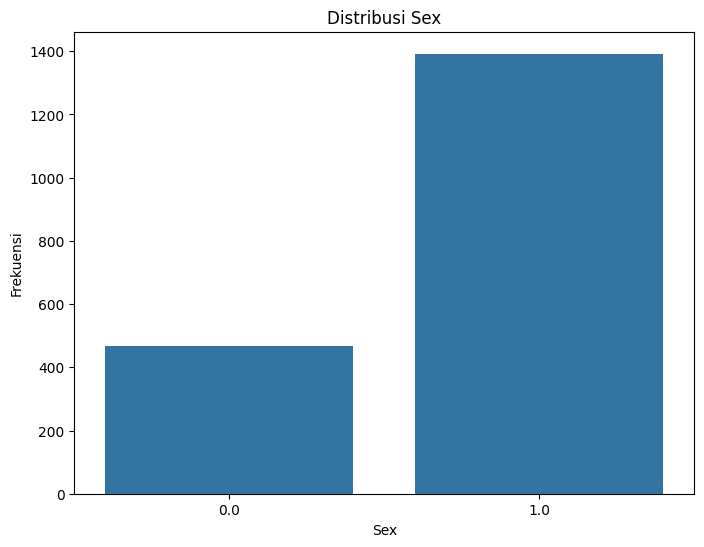

In [ ]:
# Buat bar chart untuk kolom 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(data=oversampled_df, x='Sex')
plt.title('Distribusi Sex')
plt.xlabel('Sex')
plt.ylabel('Frekuensi')
plt.show()

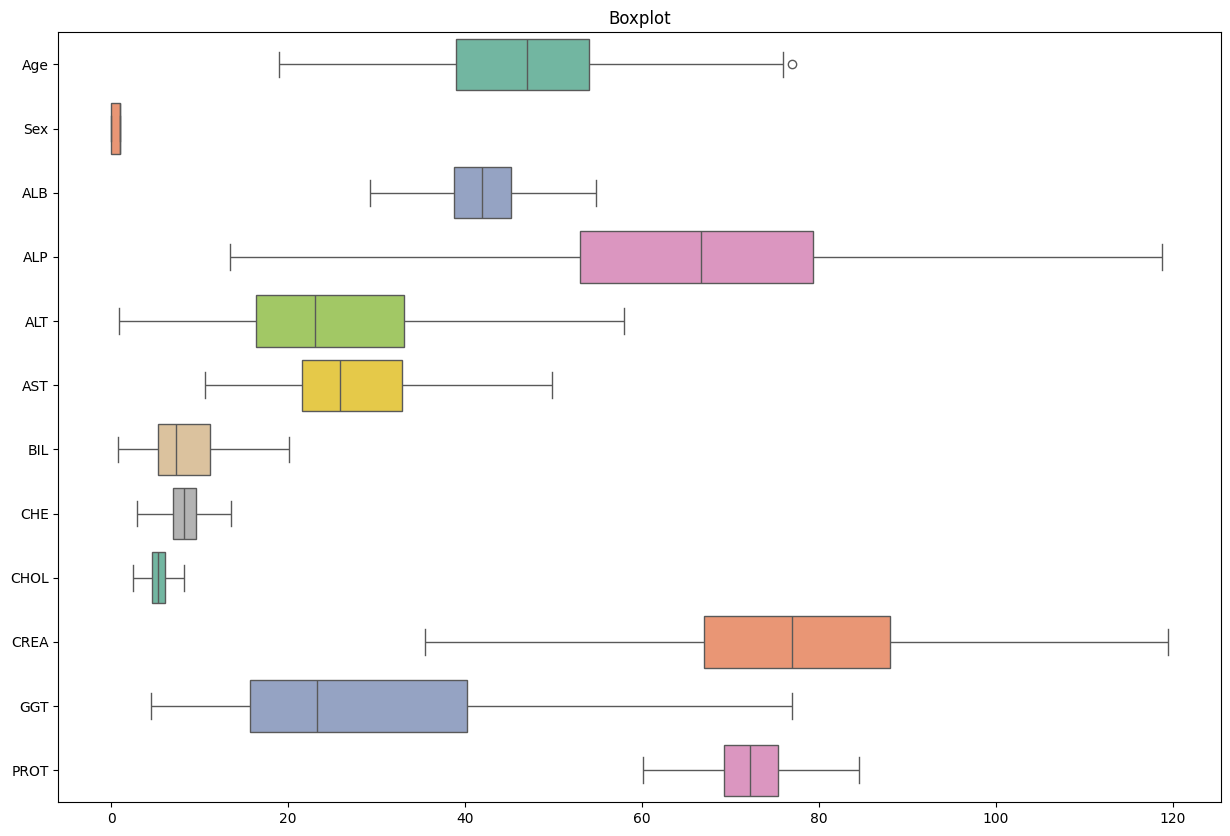

In [ ]:
# Pilih hanya kolom numerik selain kolom Target
numerical_cols = oversampled_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols[numerical_cols != 'Category']  # Menghapus kolom 'Category'

# Buat boxplot untuk setiap kolom numerik selain 'Category'
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_iqr[numerical_cols], orient='h', palette="Set2")
plt.title("Boxplot")
plt.show()

### Tabel Data

In [ ]:
# Dataset setelah proses cleaning
oversampled_df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,35.0,1.0,48.7,72.70000,24.100,31.00,20.05,9.40,3.80,90.0,20.00,75.8,0
1,37.0,1.0,41.5,64.60000,23.700,29.90,9.30,5.49,3.97,100.0,10.40,69.3,0
2,46.0,1.0,35.0,109.60000,2.300,19.20,11.00,7.10,4.10,119.5,76.95,69.1,4
3,50.0,1.0,40.0,87.80000,58.025,49.85,4.80,8.70,6.46,76.0,76.95,71.0,0
4,44.0,1.0,38.4,110.80000,17.200,30.70,4.60,9.51,5.12,74.0,25.20,73.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,61.0,1.0,39.0,102.90000,27.300,49.85,15.00,5.38,4.88,72.3,76.95,73.4,4
1856,42.0,1.0,36.0,69.60000,14.900,49.85,20.05,3.61,3.93,49.6,61.00,68.6,4
1857,58.0,0.0,34.0,46.40000,15.000,49.85,8.00,6.26,3.98,56.0,49.70,80.6,4
1858,59.0,0.0,36.0,68.28392,58.025,49.85,12.00,9.07,5.30,67.0,34.00,68.0,4


Semua missing value sudah diimputasi dan semua feature sudah bertipe data numerik

# 7.) Menentukan Label Data

Alasan menggunakan semua fitur dalam dataset:

1. Informasi Demografis:

  Usia dan jenis kelamin memengaruhi risiko penyakit Hepatitis C dan progresnya (Fibrosis, Cirrhosis).
2. Data Laboratorium:

  Fitur seperti ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, dan PROT mencerminkan fungsi hati yang relevan untuk diagnosis dan pemantauan penyakit.
3. Interaksi Antar Fitur:

  Korelasi antar fitur, seperti antara ALT dan AST, memberikan pola yang penting untuk deteksi dan klasifikasi.
4. Komprehensivitas Data:

  Menggunakan semua fitur memastikan tidak ada informasi penting yang terabaikan, sehingga model dapat menganalisis data secara menyeluruh.
5. Peningkatan Akurasi:

  Informasi tambahan dari semua fitur meningkatkan kemampuan model untuk membedakan kategori dengan lebih akurat.
6. Relevansi Fitur:

  Semua fitur memiliki kaitan langsung atau tidak langsung dengan progres penyakit dan diagnosis pasien.

## Import Library

In [ ]:
from sklearn.model_selection import train_test_split

## Splitting Data

In [ ]:
# Memisahkan kolom feature dan kolom target
X = oversampled_df.drop("Category",axis=1).values
y = oversampled_df['Category']

In [ ]:
# Split data dengan perbandingan data training dan data testing adalah 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

`train_test_split` adalah metode yang disediakan Sckit-learn yang berguna untuk membagi array atau matriks menjadi data training dan data testing secara acak https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/.

# 8.) Membangun dan Mengevaluasi Model

## Import Library

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Insialisasi Model

In [ ]:
# Inisialisasi
nb = GaussianNB()
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

models = {
    "Naive Bayes": nb,
    "Random Forest": rf,
    "SVM": svm,
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "K-Nearest Neighbors": knn,

}

## Melatih Model

### Naive Bayes

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_y_pred = nb.predict(X_test)
accuracy_nb = round(accuracy_score(y_test, nb_y_pred), 3)

In [ ]:
print(confusion_matrix(y_test, nb_y_pred))

[[ 80  22   7   1   0]
 [  0 110   0   0   0]
 [  9   7  87  11   0]
 [  0  16   6  81   8]
 [  0  15   0  28  70]]


In [ ]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80       110
           1       0.65      1.00      0.79       110
           2       0.87      0.76      0.81       114
           3       0.67      0.73      0.70       111
           4       0.90      0.62      0.73       113

    accuracy                           0.77       558
   macro avg       0.80      0.77      0.77       558
weighted avg       0.80      0.77      0.77       558



### Random Forest

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_y_pred = rf.predict(X_test)
accuracy_rf = round(accuracy_score(y_test, rf_y_pred), 3)

In [ ]:
print(confusion_matrix(y_test, rf_y_pred))

[[110   0   0   0   0]
 [  0 110   0   0   0]
 [  0   0 114   0   0]
 [  0   0   0 111   0]
 [  0   0   0   0 113]]


In [ ]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       114
           3       1.00      1.00      1.00       111
           4       1.00      1.00      1.00       113

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



### SVM

In [ ]:
svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
svm_y_pred = svm.predict(X_test)
accuracy_svm = round(accuracy_score(y_test, svm_y_pred), 3)

In [ ]:
print(confusion_matrix(y_test, svm_y_pred))

[[100   1   6   3   0]
 [  0 110   0   0   0]
 [  9   0  82  19   4]
 [  0   0   0 111   0]
 [  0   0   0  28  85]]


In [ ]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       110
           1       0.99      1.00      1.00       110
           2       0.93      0.72      0.81       114
           3       0.69      1.00      0.82       111
           4       0.96      0.75      0.84       113

    accuracy                           0.87       558
   macro avg       0.90      0.88      0.88       558
weighted avg       0.90      0.87      0.87       558



### Logistic Regression

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
lr_y_pred = lr.predict(X_test)
accuracy_lr = round(accuracy_score(y_test, lr_y_pred), 3)

In [ ]:
print(confusion_matrix(y_test, lr_y_pred))

[[ 94   5  10   1   0]
 [  0 110   0   0   0]
 [  9   0  81  24   0]
 [  0   0  19  92   0]
 [  0   0   0  16  97]]


In [ ]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       110
           1       0.96      1.00      0.98       110
           2       0.74      0.71      0.72       114
           3       0.69      0.83      0.75       111
           4       1.00      0.86      0.92       113

    accuracy                           0.85       558
   macro avg       0.86      0.85      0.85       558
weighted avg       0.86      0.85      0.85       558



### Decision Tree

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_y_pred = dt.predict(X_test)
accuracy_dt = round(accuracy_score(y_test, dt_y_pred), 3)

In [ ]:
print(confusion_matrix(y_test, dt_y_pred))

[[101   0   3   5   1]
 [  0 110   0   0   0]
 [  0   0 114   0   0]
 [  0   0   0 111   0]
 [  0   0   0   0 113]]


In [ ]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       110
           1       1.00      1.00      1.00       110
           2       0.97      1.00      0.99       114
           3       0.96      1.00      0.98       111
           4       0.99      1.00      1.00       113

    accuracy                           0.98       558
   macro avg       0.98      0.98      0.98       558
weighted avg       0.98      0.98      0.98       558



### K-Nearest Neighbor

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_y_pred = knn.predict(X_test)
accuracy_knn = round(accuracy_score(y_test, knn_y_pred), 3)

In [ ]:
print(confusion_matrix(y_test, knn_y_pred))

[[103   1   0   5   1]
 [  0 110   0   0   0]
 [  0   0 114   0   0]
 [  0   0   0 111   0]
 [  0   0   0   0 113]]


In [ ]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       110
           1       0.99      1.00      1.00       110
           2       1.00      1.00      1.00       114
           3       0.96      1.00      0.98       111
           4       0.99      1.00      1.00       113

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



## Handling Overfitting

### Mengurangi Cabang pada Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
accuracy_knn = round(accuracy_score(y_test, rf_y_pred), 3)

In [ ]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       110
           1       1.00      1.00      1.00       110
           2       0.96      1.00      0.98       114
           3       0.93      1.00      0.97       111
           4       1.00      0.95      0.97       113

    accuracy                           0.98       558
   macro avg       0.98      0.98      0.98       558
weighted avg       0.98      0.98      0.98       558



# 9.) Komparasi Model

<ipython-input-1858-c2a6ffa7dd51>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


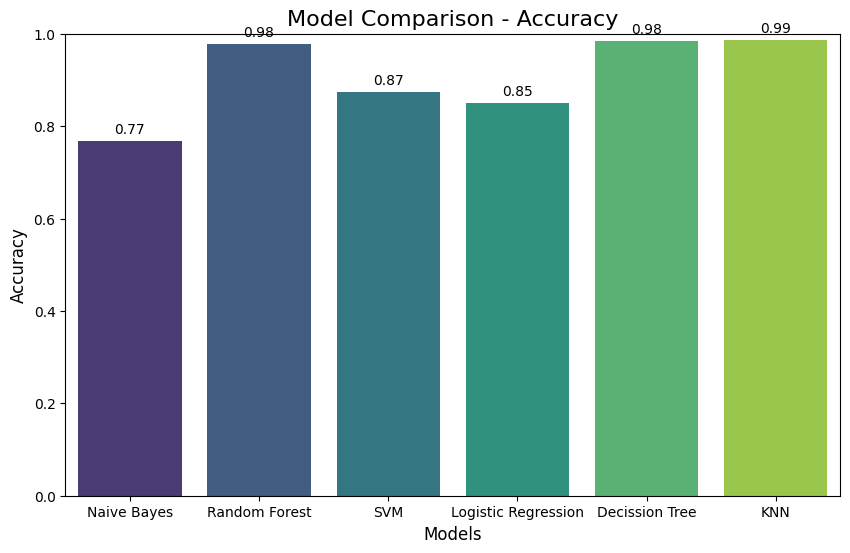

In [ ]:
models = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Decission Tree', 'KNN']
accuracies = [
    accuracy_score(y_test, nb_y_pred),;
    accuracy_score(y_test, rf_y_pred),
    accuracy_score(y_test, svm_y_pred),
    accuracy_score(y_test, lr_y_pred),
    accuracy_score(y_test, dt_y_pred),
    accuracy_score(y_test, knn_y_pred)
]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.show()

# 10.) Optimisasi Model

Tidak perlu melakukan optimasi model karena model dengan akurasi tertinggi sudah mencapai 99%

# 11.) Kesimpulan

# 12.) Streamlit (Deployment)